In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('ulazni_podaci_iupred3.csv')
df.head()

,Naziv_proteina,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,...,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y,Klasifikacija
0,AAD14585.1 |virion spike glycoprotein precursor,0.0599,0.0240,0.0499,0.0519,0.0579,0.0858,0.0180,0.0739,0.0459,...,0.0479,0.0479,0.0379,0.0539,0.0479,0.0898,0.0579,0.0279,0.0279,uređen
1,AAD14585.1 |virion spike glycoprotein precursor,0.1029,0.0000,0.0571,0.0571,0.0057,0.0571,0.0514,0.0286,0.0400,...,0.0743,0.0629,0.0457,0.0343,0.1371,0.1600,0.0343,0.0000,0.0057,neuređen
2,AAQ55048.1 |virion spike glycoprotein precursor,0.0624,0.0241,0.0483,0.0543,0.0584,0.0865,0.0181,0.0724,0.0463,...,0.0463,0.0483,0.0382,0.0563,0.0463,0.0905,0.0543,0.0282,0.0282,uređen
3,AAQ55048.1 |virion spike glycoprotein precursor,0.1061,0.0000,0.0559,0.0559,0.0000,0.0559,0.0503,0.0279,0.0391,...,0.0782,0.0782,0.0447,0.0335,0.1229,0.1564,0.0391,0.0000,0.0056,neuređen
4,ABX75367.1 |virion spike glycoprotein precursor,0.0599,0.0240,0.0499,0.0519,0.0579,0.0858,0.0180,0.0739,0.0459,...,0.0479,0.0479,0.0379,0.0539,0.0479,0.0898,0.0579,0.0279,0.0279,uređen


In [3]:
df.any()

Naziv_proteina          True
molska_frakcija_za_A    True
molska_frakcija_za_C    True
molska_frakcija_za_D    True
molska_frakcija_za_E    True
molska_frakcija_za_F    True
molska_frakcija_za_G    True
molska_frakcija_za_H    True
molska_frakcija_za_I    True
molska_frakcija_za_K    True
molska_frakcija_za_L    True
molska_frakcija_za_M    True
molska_frakcija_za_N    True
molska_frakcija_za_P    True
molska_frakcija_za_Q    True
molska_frakcija_za_R    True
molska_frakcija_za_S    True
molska_frakcija_za_T    True
molska_frakcija_za_V    True
molska_frakcija_za_W    True
molska_frakcija_za_Y    True
Klasifikacija           True
dtype: bool

In [4]:
y = df['Klasifikacija']
X = df.drop(columns=['Naziv_proteina', 'Klasifikacija'], axis=1)

In [5]:
X.shape

(1282, 20)

In [6]:
y.shape

(1282,)

In [7]:
feature_names = X.columns
df[feature_names]

,molska_frakcija_za_A,molska_frakcija_za_C,molska_frakcija_za_D,molska_frakcija_za_E,molska_frakcija_za_F,molska_frakcija_za_G,molska_frakcija_za_H,molska_frakcija_za_I,molska_frakcija_za_K,molska_frakcija_za_L,molska_frakcija_za_M,molska_frakcija_za_N,molska_frakcija_za_P,molska_frakcija_za_Q,molska_frakcija_za_R,molska_frakcija_za_S,molska_frakcija_za_T,molska_frakcija_za_V,molska_frakcija_za_W,molska_frakcija_za_Y
0,0.0599,0.0240,0.0499,0.0519,0.0579,0.0858,0.0180,0.0739,0.0459,0.0898,0.0040,0.0479,0.0479,0.0379,0.0539,0.0479,0.0898,0.0579,0.0279,0.0279
1,0.1029,0.0000,0.0571,0.0571,0.0057,0.0571,0.0514,0.0286,0.0400,0.0343,0.0114,0.0743,0.0629,0.0457,0.0343,0.1371,0.1600,0.0343,0.0000,0.0057
2,0.0624,0.0241,0.0483,0.0543,0.0584,0.0865,0.0181,0.0724,0.0463,0.0885,0.0040,0.0463,0.0483,0.0382,0.0563,0.0463,0.0905,0.0543,0.0282,0.0282
3,0.1061,0.0000,0.0559,0.0559,0.0000,0.0559,0.0503,0.0279,0.0391,0.0391,0.0112,0.0782,0.0782,0.0447,0.0335,0.1229,0.1564,0.0391,0.0000,0.0056
4,0.0599,0.0240,0.0499,0.0519,0.0579,0.0858,0.0180,0.0739,0.0459,0.0898,0.0040,0.0479,0.0479,0.0379,0.0539,0.0479,0.0898,0.0579,0.0279,0.0279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,0.0534,0.0000,0.0388,0.0631,0.0194,0.0534,0.0388,0.0291,0.0388,0.0534,0.0097,0.0534,0.1214,0.0437,0.0388,0.0971,0.1845,0.0631,0.0000,0.0000
1278,0.0577,0.0256,0.0491,0.0534,0.0577,0.0748,0.0235,0.0641,0.0470,0.0897,0.0085,0.0577,0.0534,0.0385,0.0427,0.0427,0.0919,0.0641,0.0278,0.0299
1279,0.0337,0.0000,0.0529,0.0625,0.0096,0.0240,0.0433,0.0433,0.0192,0.0481,0.0096,0.0769,0.1490,0.0385,0.0721,0.0769,0.1827,0.0481,0.0048,0.0048
1280,0.0671,0.0291,0.0403,0.0626,0.0582,0.0761,0.0201,0.0783,0.0470,0.0872,0.0067,0.0515,0.0425,0.0403,0.0559,0.0470,0.0738,0.0604,0.0336,0.0224


In [8]:
y.unique()

array(['uređen', 'neuređen'], dtype=object)

In [9]:
y.replace("uređen", 1, inplace=True)
y.replace("neuređen", 0, inplace = True)

/tmp/ipykernel_270060/439406901.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace("neuređen", 0, inplace = True)


In [10]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1277    0
1278    1
1279    0
1280    1
1281    0
Name: Klasifikacija, Length: 1282, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
#Cuvanje trening i test podataka u CSV datoteke
trening_podaci = pd.concat([X_train, y_train], axis=1)
test_podaci = pd.concat([X_test, y_test], axis=1)
trening_podaci.to_csv('trening_podaci_CART.csv', index=False)
test_podaci.to_csv('test_podaci_CART.csv', index=False)

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
from sklearn.model_selection import GridSearchCV

params = { 'criterion' : ['gini', 'entropy'],
           'max_depth' : [2,4,6,8]
         }

model = GridSearchCV(DecisionTreeClassifier(), params, scoring = 'accuracy', cv=5, verbose=2)

In [15]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]},
             scoring='accuracy', verbose=2)

In [16]:
model.best_score_

np.float64(1.0)

In [17]:
model.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [18]:
best_model = model.best_estimator_

In [19]:
best_model

DecisionTreeClassifier(max_depth=4)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
y_pred_train = model.predict(X_train) 
confusion_matrix(y_train, y_pred_train)

array([[448,   0],
       [  0, 449]])

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.9974025974025974

In [24]:
confusion_matrix(y_test, y_pred)

array([[192,   1],
       [  0, 192]])

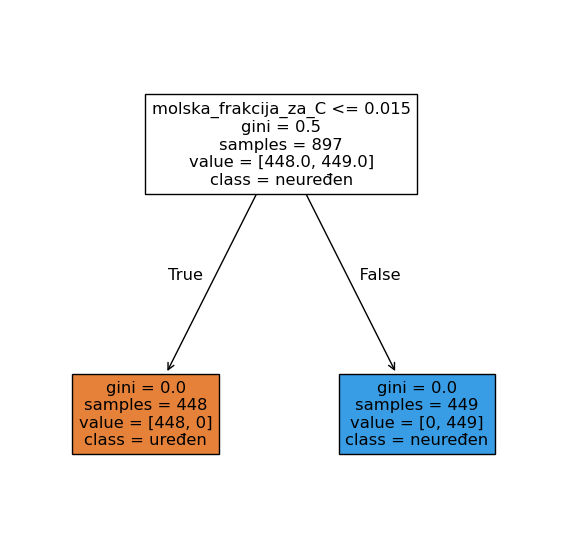

In [25]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 7))
plot_tree(best_model, class_names=['uređen', 'neuređen'], feature_names=feature_names, filled=True)
plt.show()